# Importações

In [1]:
import community
import csv
import os
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import statistics
import sys

from operator import itemgetter

# Caminhos dos dados da rede

In [2]:
module_path = os.path.abspath(os.path.join('..'))
src_path = '{}/src'.format(module_path)
if module_path not in sys.path:
    sys.path.append(src_path)

c_elegans_undir_names_path = '{}/data/c_elegans_undir_names.txt'.format(module_path)
c_elegans_undir_path = '{}/data/c_elegans_undir.net'.format(module_path)

# Leitura do arquivo c_elegans_undir_names.txt

In [3]:
with open(c_elegans_undir_names_path, 'r') as celenamenet:
    nodereader = celenamenet.read()
    nodes = { n.split(' ')[0]: n.split(' ')[1] for n in nodereader.split('\n')[:-1] }
    node_names = [ nodes[n] for n in nodes ]
    #print(nodes)

# Leitura do arquivo c_elegans_undir.net

In [4]:
with open(c_elegans_undir_path, 'r') as celenet:
    edgereader = celenet.read()
    edges = [tuple([nodes[v] for v in n.split(' ')]) for n in edgereader.split('\n')[:-1]]
    #print(edges)

# Grafo ( Rede Complexa ) 

In [5]:
G = nx.Graph() # inicializando o grafo                                                   
G.add_nodes_from(node_names) # cria os nós                           
G.add_edges_from(edges) # adiciona as arestas no grafo  
print(nx.info(G)) # imprime informações do grafo (resumo)

density = nx.density(G)
print('Densidade da rede: ', density)
print('Grafo é conexo? ', nx.is_connected(G))

Name: 
Type: Graph
Number of nodes: 279
Number of edges: 2287
Average degree:  16.3943
Densidade da rede:  0.05897217709703205
Grafo é conexo?  True


# Componentes da rede

In [6]:
components = nx.connected_components(G)
print('Componentes: ', components)

largest_component = max(components, key=len)
print('Maior componente: ', largest_component)

subgraph = G.subgraph(largest_component)
diameter = nx.diameter(subgraph)
print('Diâmetro do maior componente: ', diameter)

Componentes:  <generator object connected_components at 0x7f5489d28228>
Maior componente:  {'ASGR', 'IL1VL', 'SMDDR', 'PDEL', 'DB01', 'PVWL', 'PLNL', 'AVHL', 'DA09', 'AVER', 'AUAR', 'AS11', 'ASER', 'ASJL', 'DVC', 'SABVR', 'RMDDR', 'PVNL', 'SMBDL', 'PVQR', 'IL1L', 'ADAL', 'ASEL', 'AIZL', 'RIGL', 'DA01', 'AVAR', 'VB10', 'SDQL', 'AIMR', 'PVNR', 'ASIL', 'AVL', 'PVQL', 'DVB', 'PVPR', 'VC05', 'VA05', 'RMFL', 'HSNR', 'VB11', 'RIFL', 'PDA', 'ADAR', 'DD02', 'DD03', 'URXR', 'OLQVR', 'VB01', 'SMDVL', 'LUAR', 'AS01', 'VB02', 'DA03', 'AS03', 'RMHL', 'RMED', 'ASJR', 'AUAL', 'VD13', 'OLQDR', 'AS06', 'RMER', 'IL2L', 'ASHR', 'SIBDR', 'PHAL', 'VA10', 'VA09', 'VD03', 'IL2DL', 'PVT', 'AVAL', 'PVPL', 'RICL', 'AWAL', 'AWCL', 'VB04', 'AIBL', 'URAVL', 'BDUR', 'PLML', 'VB09', 'AS10', 'AS09', 'AWBR', 'ALA', 'RIGR', 'PDB', 'VA07', 'IL1VR', 'AS05', 'AVM', 'OLQVL', 'PLNR', 'AVDL', 'RMEL', 'CEPVL', 'SIBDL', 'AINR', 'RMFR', 'SAAVL', 'DB06', 'RMGL', 'SMBVL', 'PDER', 'RIH', 'IL2VL', 'AS04', 'VD10', 'ADEL', 'RIPL', 'IL

## a) Forneça uma breve explicação da rede analisada.

TODO (explicação da rede analisada)

## b) Calcule e plote a distribuição do grau dos nodos desse grafo. Discuta se a curva parece uma Power Law. Faça uma regressão linear na tentativa de obter o coeficiente alfa. Calcule também o grau médio do grafo.

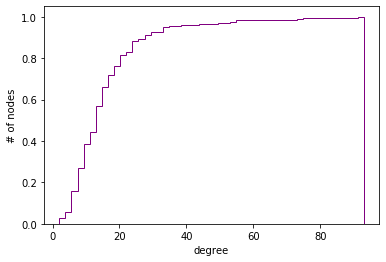

<Figure size 432x288 with 0 Axes>

In [7]:
degree_dict = dict(G.degree(G.nodes()))

degrees = list()
for key in degree_dict.keys():
    degrees.append(degree_dict[key])

plt.hist(degrees, bins=50, density=1,
cumulative=True, label='CDF DATA',
histtype='step', color='purple')
plt.ylabel('# of nodes')
plt.xlabel('degree')
plt.show()
plt.savefig('degree_cdf.png')

TODO (Discussão se a curva parece uma Power Law)

In [8]:
# TODO Regressão Linear para tentar obter o coeficiente alfa

In [9]:
degree_median = statistics.median(degrees)
print('Grau médio do grafo: ', degree_median)

Grau médio do grafo:  13


## c) Calcule o número de componentes do grafo.

In [10]:
components_num = nx.number_connected_components(G)
print('Número de componentes no grafo: ', components_num)

Número de componentes no grafo:  1


## d) Calcule o coeficiente de clusterização de cada nodo e plote a distribuição. Calcule também o coeficiente de clusterização global do grafo.

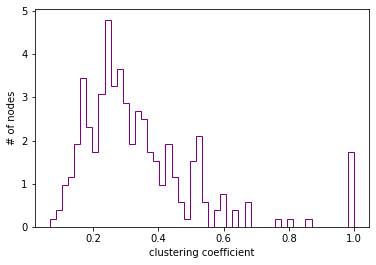

<Figure size 432x288 with 0 Axes>

In [11]:
clust_coef_nodes = nx.clustering(G)

clust_coefs = list()
for key in clust_coef_nodes.keys():
    clust_coefs.append(clust_coef_nodes[key])

plt.hist(clust_coefs, bins=50, density=1,
cumulative=False, label='CDF DATA',
histtype='step', color='purple')
plt.ylabel('# of nodes')
plt.xlabel('clustering coefficient')
plt.show()
plt.savefig('clustering_coefficient_cdf.png')

In [12]:
clust_coef_graph = nx.average_clustering(G)
print('Coeficiente de clusterização global do grafo: ', clust_coef_graph)

Coeficiente de clusterização global do grafo:  0.3371339990890197


## e) Plote a distribuição do tamanho dos componentes do grafo. Se o grafo possuir apenas um componente não é preciso plotar.

Não é preciso plotar pois há somente um componente

## f) Calcule o overlap da vizinhança para cada par de nodo e plote a distribuição dos valores encontrados.

In [13]:
# TODO questão E

## g) Calcule a distância média e a distribuição das distâncias de todos os nodos da rede.

In [14]:
# TODO questão G

## h) Calcule o betweenness dos nodos e das arestas desse grafo e plote a distribuição. O que acontece com o grafo à medida que você retira os nodos e arestas com maior betweenness?

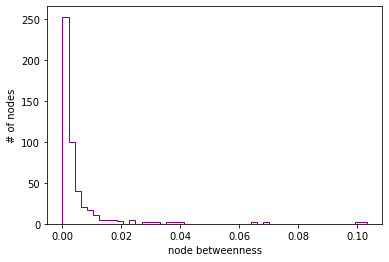

<Figure size 432x288 with 0 Axes>

In [15]:
node_betweenness = nx.betweenness_centrality(G)

nb_list = list()
for key in node_betweenness.keys():
    nb_list.append(node_betweenness[key])

plt.hist(nb_list, bins=50, density=1,
cumulative=False, label='CDF DATA',
histtype='step', color='purple')
plt.ylabel('# of nodes')
plt.xlabel('node betweenness')
plt.show()
plt.savefig('node_betweenness_cdf.png')

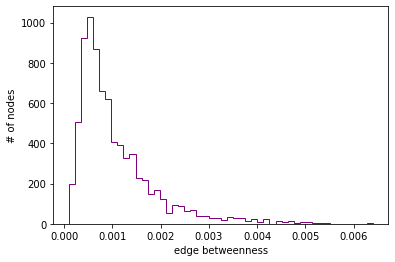

<Figure size 432x288 with 0 Axes>

In [16]:
edge_betweenness = nx.edge_betweenness_centrality(G)

eb_list = list()
for key in edge_betweenness.keys():
    eb_list.append(edge_betweenness[key])
    
plt.hist(eb_list, bins=50, density=1,
cumulative=False, label='CDF DATA',
histtype='step', color='purple')
plt.ylabel('# of nodes')
plt.xlabel('edge betweenness')
plt.show()
plt.savefig('edge_betweenness_cdf.png')

TODO (Explicação sobre o que acontece com o grafo à medida que se retira os nodos e arestas com maior betweenness)

## i) Implemente uma abordagem para encontrar arestas com grandes chances de serem pontes. Implemente o conceito de bridge span e escolha um valor de bridge span interessante para o seu grafo.

In [17]:
# TODO questão I

## j) Calcule a assortatividade do grafo. Plote o gráfico da assortatividade além de apresentar o coeficiente de Pearson.

In [18]:
assortativity = nx.degree_assortativity_coefficient(G)
print('Assortatividade da rede: ', assortativity)

Assortatividade da rede:  -0.09265380743986654


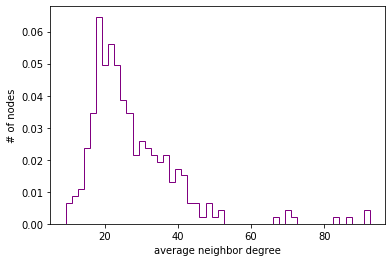

<Figure size 432x288 with 0 Axes>

In [19]:
avg_neighbor_degree = nx.average_neighbor_degree(G)

avg_nd_list = list()
for key in avg_neighbor_degree.keys():
    avg_nd_list.append(avg_neighbor_degree[key])
    
plt.hist(avg_nd_list, bins=50, density=1,
cumulative=False, label='CDF DATA',
histtype='step', color='purple')
plt.ylabel('# of nodes')
plt.xlabel('average neighbor degree')
plt.show()
plt.savefig('assortativity_cdf.png')

In [20]:
pearson_coefficient = nx.degree_pearson_correlation_coefficient(G)
print('Coeficiente de Pearson: ', pearson_coefficient)

Coeficiente de Pearson:  -0.09265380743986673


## Plote uma visualização do grafo ou de parte, ex. um componente, do grafo caso ele seja muito grande. Para essa tarefa você pode utilizar qualquer ferramenta. Uma sugestão é usar o gephi (gephi.org/)

In [21]:
# TODO plotar uma visualização do grafo